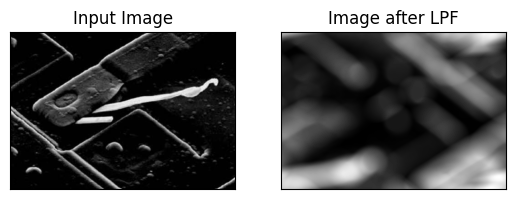

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('/content/image.jpg').convert('L')
img = np.array(img)
rows, cols = img.shape

# Fourier transform of image
f = np.fft.fft2(img)

# Lowpass filter kernel
d = 30
h = np.zeros((rows, cols))
center = (rows//2, cols//2)
for i in range(rows):
    for j in range(cols):
        if np.sqrt((i-center[0])**2 + (j-center[1])**2) <= d:
            h[i,j] = 1

# Fourier transform of lowpass filter kernel
H = np.fft.fft2(h)

# Multiplication of Fourier transforms
G = H * f

# Inverse Fourier transform
g = np.fft.ifft2(G)
g = np.abs(g)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(g, cmap = 'gray')
plt.title('Image after LPF'), plt.xticks([]), plt.yticks([])
plt.show()
